### Build an MLP for ECG Signal Classification (5 classes)  - Keras
This is the implementation of an MLP for classifying the ECG signals. <br>


In [4]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 13.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━

In [280]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

### Load the data

In [3]:
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [3]:
pd.read_csv('ECG_dataX.csv').head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pd.read_csv('ECG_dataY.csv').head()

,class_label
0,0
1,0
2,0
3,0
4,0


In [4]:
#convert dataframe to numpy array
X=X.values
X.shape
X1=X.copy()


(3841, 187)

In [5]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [6]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

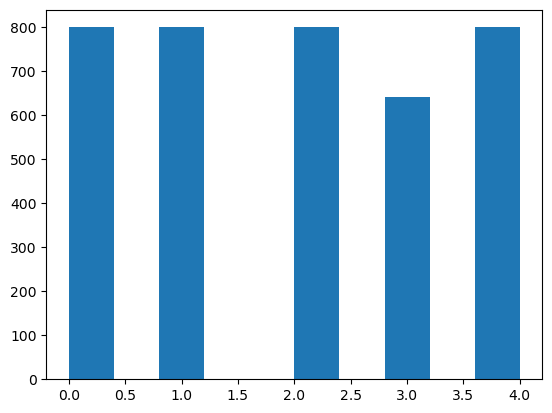

In [6]:
plt.hist(Y)

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints

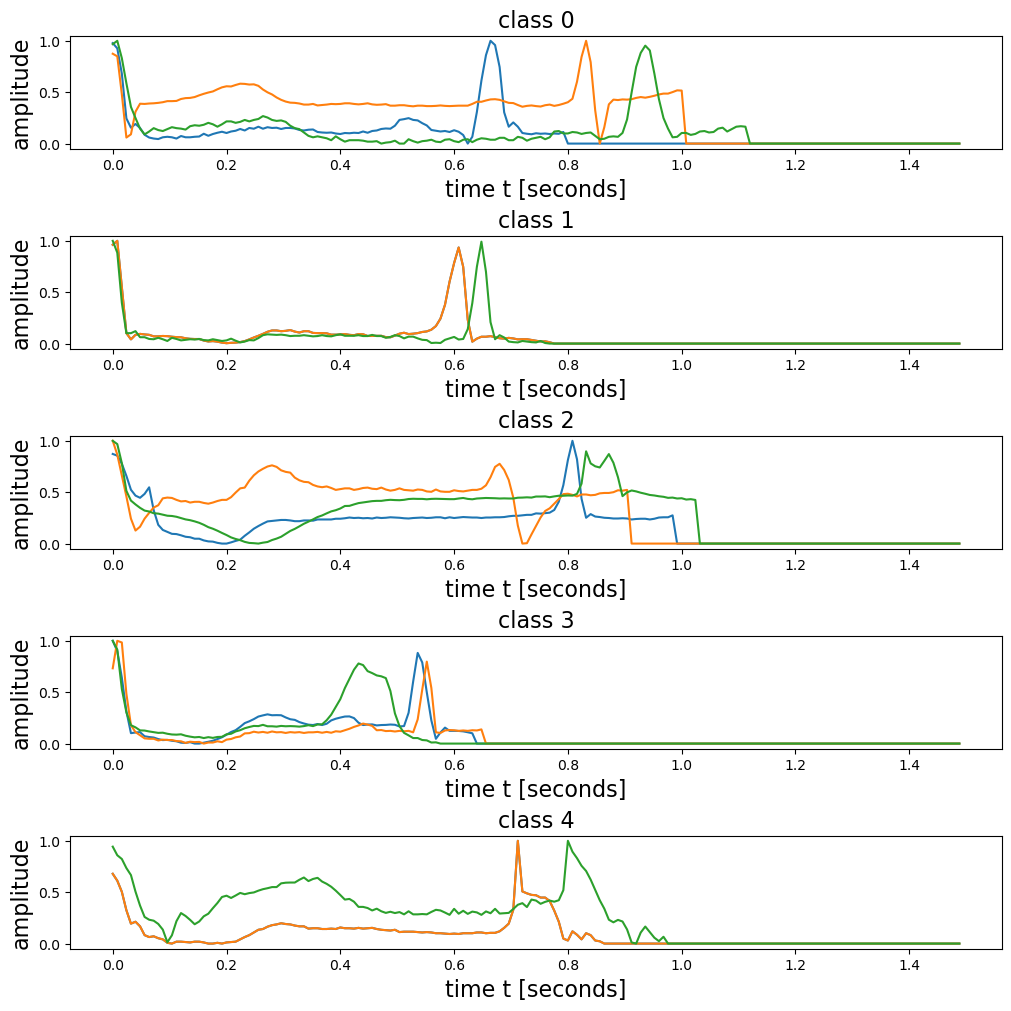

In [8]:
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

In [333]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#note: you may need to add a channel axis to the data if the network is CNN

In [335]:
Y_train.shape, Y_val.shape

((2764,), (308,))

In [336]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
Y_train_encoded = to_categorical(Y_train, num_classes=5)
Y_val_encoded = to_categorical(Y_val, num_classes=5)


In [339]:
Y_train_encoded.shape,Y_val_encoded.shape

((2764, 5), (308, 5))

In [63]:
Y_val_encoded.reshape(-1,1,308)

array([[[0., 0., 1., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 1., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling1D, LayerNormalization,Flatten
from keras.activations import softmax


In [65]:
from keras.layers import Input
from tensorflow.keras.layers import Add
from keras.layers import Reshape
from keras.layers import GlobalAveragePooling1D
from keras.models import Model


In [330]:
inp=Input(shape=(187,1))
#---1st Layer-------
D1=Dense(32)(inp)
A1=Activation("relu")(D1)
#---Max_Pooling------
M1=MaxPooling1D(pool_size=2,strides=2)(A1)
#---2nd Layer---------
D2=Dense(32)(A1)
A2=Activation("relu")(D2)
#GAP_A2=Flatten()(A2)
GAP_A2 = GlobalAveragePooling1D()(A2)
S21=Add()([GAP_A2,M1])
#---Max_Pooling-----
M2=MaxPooling1D(pool_size=2,strides=2)(S21)
#---3rd Layer-------
LN3=LayerNormalization()(S21)
D3=Dense(32)(LN3)
A3=Activation("relu")(D3)
GAP_A3 = GlobalAveragePooling1D()(A3)
S32=Add()([GAP_A3,M2])
#---Max Pooling-----
M3=MaxPooling1D(pool_size=2,strides=2)(S32)
#---4th Layer-------
LN4=LayerNormalization()(S32)
D4=Dense(32)(LN4)
A4=Activation("relu")(D4)
GAP_A4 = GlobalAveragePooling1D()(A4)
S43=Add()([GAP_A4,M3])
#---5th Layer-------
LN5=LayerNormalization()(S43)
D5=Dense(32)(LN5)
A5=Activation("relu")(D5)
F1=Flatten()(A5)
#---6th Layer-------
D6=Dense(5)(F1)
A6=Activation(softmax)(D6)
#----
model=Model(inputs=inp,outputs=A6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_38 (InputLayer)       [(None, 187, 1)]             0         []                            
                                                                                                  
 dense_110 (Dense)           (None, 187, 32)              64        ['input_38[0][0]']            
                                                                                                  
 activation_108 (Activation  (None, 187, 32)              0         ['dense_110[0][0]']           
 )                                                                                                
                                                                                                  
 dense_111 (Dense)           (None, 187, 32)              1056      ['activation_108[0][0]']

In [299]:
A1.shape, M1.shape, A2.shape

(TensorShape([None, 187, 32]),
 TensorShape([None, 93, 32]),
 TensorShape([None, 187, 32]))

In [300]:
S43.shape

TensorShape([None, 23, 32])

In [301]:
D6.shape,A6.shape

(TensorShape([None, 5]), TensorShape([None, 5]))

### Define the MLP model  (Replace this with your network and rename the file)

model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(187,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(learning_rate=0.001), metrics=['accuracy'])
model.summary()

In [302]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

In [303]:
Y_train.shape

(2764,)

In [304]:
Y_train_encoded.shape

(2764, 1, 5)

In [305]:
X_train.shape

(2764, 187, 1)

In [306]:
X_train=np.array(X_train)

In [307]:
X_train=X_train.reshape(-1,187,1)
X_train.shape

(2764, 187, 1)

In [308]:
X_val=np.array(X_val)

In [309]:
X_val.reshape(-1,187,1)

array([[[0.        ],
        [0.01980198],
        [0.08712871],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.70711297],
        [0.38075313],
        [0.18828452],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.79079497],
        [0.8242678 ],
        [0.79288703],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.98563218],
        [0.73563218],
        [0.27873564],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.92838877],
        [0.71099746],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.9173913 ],
        [0.75652176],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [310]:
X_train=X_train.reshape(-1,187,1)
X_train[0].shape, X_val[0].shape

((187, 1), (187,))

In [311]:
X_train=X_train.reshape(2764, 187,1)

In [312]:
Y_train_encoded

array([[[1., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1., 0.]],

       [[1., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0.]]], dtype=float32)

In [340]:
for epoch in range(epoch_save+1, 1000): #change 100 to a larger number if necessary
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a file 
    model.save('ECG_Keras_sCE_e'+str(epoch)+'.keras')

epoch 0
44/44 [==============================] - 9s 47ms/step - loss: 1.4546 - accuracy: 0.3784 - val_loss: 1.3794 - val_accuracy: 0.4253
epoch 1
44/44 [==============================] - 2s 37ms/step - loss: 1.3168 - accuracy: 0.4240 - val_loss: 1.3337 - val_accuracy: 0.4481
epoch 2
44/44 [==============================] - 2s 37ms/step - loss: 1.2666 - accuracy: 0.4721 - val_loss: 1.2799 - val_accuracy: 0.4935
epoch 3
44/44 [==============================] - 2s 43ms/step - loss: 1.2271 - accuracy: 0.4967 - val_loss: 1.2857 - val_accuracy: 0.4643
epoch 4
44/44 [==============================] - 2s 45ms/step - loss: 1.1918 - accuracy: 0.5185 - val_loss: 1.2214 - val_accuracy: 0.5032
epoch 5
44/44 [==============================] - 2s 46ms/step - loss: 1.1711 - accuracy: 0.5271 - val_loss: 1.1854 - val_accuracy: 0.5162
epoch 6
44/44 [==============================] - 2s 40ms/step - loss: 1.1463 - accuracy: 0.5456 - val_loss: 1.1712 - val_accuracy: 0.5617
epoch 7
44/44 [===================

### Train the model

for epoch in range(epoch_save+1, 100): #change 100 to a larger number if necessary
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train_encoded, batch_size=64, epochs=1, validation_data=(X_val, Y_val_encoded))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a file 
    model.save('ECG_Keras_sCE_e'+str(epoch)+'.keras')

### Plot training loss vs epoch and validation loss vs epoch

In [341]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

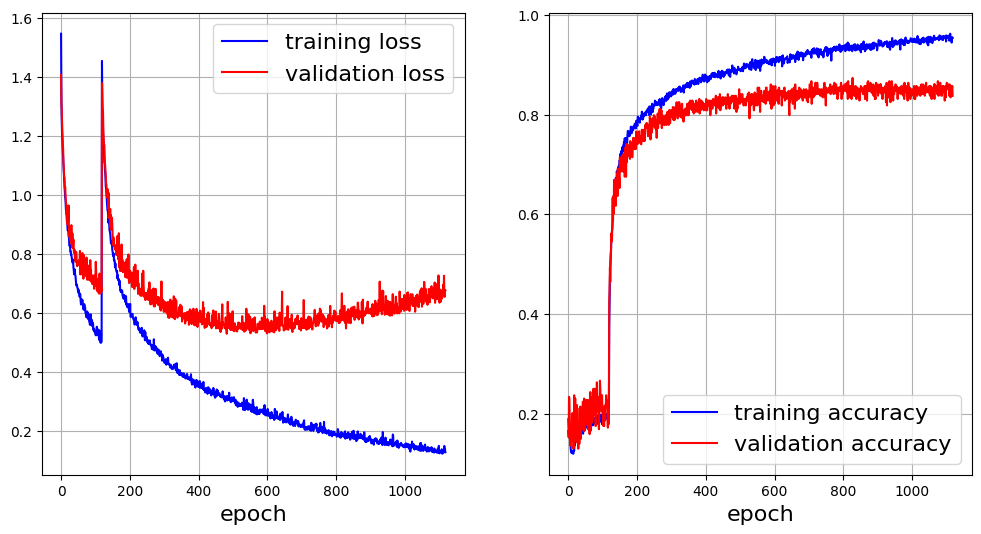

In [342]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

### Test the model

In [343]:
#load the best model
best_epoch=np.argmax(acc_val_list)
best_epoch

827

In [344]:
import tensorflow
model = tensorflow.keras.models.load_model("ECG_Keras_sCE_e"+str(best_epoch)+".keras")

In [345]:
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.369600385427475
Test accuracy: 0.8907672166824341


### Make Prediction on the test set

In [346]:
Y_test_pred=model.predict(X_test, batch_size=64)

13/13 [==============================] - 1s 19ms/step


In [347]:
Y_test_pred[0]

array([6.6702510e-04, 9.9818128e-01, 5.3442138e-05, 2.7706409e-07,
       1.0979177e-03], dtype=float32)

In [348]:
np.argmax(Y_test_pred[0])

1

In [349]:
Y_test[0]

1

In [350]:
Y_test_pred=np.argmax(Y_test_pred, axis=1)

In [352]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       176
           1       0.90      0.90      0.90       154
           2       0.85      0.88      0.87       146
           3       0.86      0.97      0.91       122
           4       0.96      0.94      0.95       171

    accuracy                           0.89       769
   macro avg       0.89      0.90      0.89       769
weighted avg       0.89      0.89      0.89       769

